In [1]:
import pandas as pd
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.get_dummies(df, columns = ['purpose'], drop_first=True)

X = df.drop('credit.policy', axis = 1)
y = df['credit.policy']

In [3]:
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,False,False,False,False,False,False
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,False,False,False,False,False,False
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,False,True,False,False,False,False
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,False,False,False,True,False,False


In [4]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(X_train.shape, X_val.shape, X_test.shape)

(6704, 18) (1437, 18) (1437, 18)


In [5]:
X_train

array([[-0.15522071,  0.96978383,  0.47515398, ...,  3.81503923,
        -0.22204389, -0.2621205 ],
       [-0.38139207, -0.3467776 , -1.69078518, ..., -0.2621205 ,
        -0.22204389, -0.2621205 ],
       [ 0.29341429, -0.88919741, -0.8701731 , ..., -0.2621205 ,
        -0.22204389, -0.2621205 ],
       ...,
       [ 0.74575702,  1.96022186,  0.13657867, ..., -0.2621205 ,
        -0.22204389, -0.2621205 ],
       [-0.21825207, -0.33913789,  0.10949238, ..., -0.2621205 ,
        -0.22204389, -0.2621205 ],
       [ 0.5937402 ,  0.04771396,  0.77392127, ..., -0.2621205 ,
        -0.22204389, -0.2621205 ]])

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(32,  activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
128*64

8192

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,801 (50.00 KB)

 Trainable params: 12,801 (50.00 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(x = X_train, y = y_train, validation_data = (X_val, y_val), epochs = 10, batch_size = 16)

Epoch 1/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9932 - loss: 0.0214 - val_accuracy: 0.9576 - val_loss: 0.1882
Epoch 2/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9932 - loss: 0.0216 - val_accuracy: 0.9408 - val_loss: 0.2395
Epoch 3/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9861 - loss: 0.0430 - val_accuracy: 0.9589 - val_loss: 0.1711
Epoch 4/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9957 - loss: 0.0146 - val_accuracy: 0.9687 - val_loss: 0.1519
Epoch 5/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9950 - loss: 0.0165 - val_accuracy: 0.9624 - val_loss: 0.1619
Epoch 6/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9949 - loss: 0.0158 - val_accuracy: 0.9582 - val_loss: 0.1668
Epoch 7/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9929 - loss: 0.0182 - val_accuracy: 0.9513 - val_loss: 0.1798
Epoch 8/10
419/419 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9914 - loss: 0.0233 - val_accuracy: 0.

In [10]:
model.evaluate(X_test, y_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9451 - loss: 0.1371


[0.13252264261245728, 0.9464161396026611]

In [11]:
model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[0.99937856],
       [0.05035892],
       [0.99994826],
       ...,
       [0.9999981 ],
       [0.99993634],
       [0.96072435]], dtype=float32)

In [12]:
from collections import Counter
Counter(y_test)

Counter({1: 1140, 0: 297})

In [13]:
1140/(1140+297)

0.7933194154488518

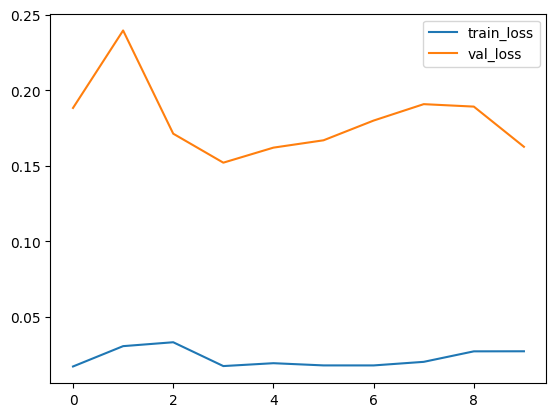

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

In [19]:
from tensorflow.keras.models import load_model
model.save('loan_model.h5')

In [ ]:
num_nodes_layer_1 = [32, 64, 128, 256]
num_nodes_layer_2 = [32, 64, 128, 256]
num_epochs = [5,10,20,40]

for n1 in num_nodes_layer_1:
    for n2 in num_nodes_layer_2:
        for e in num_epochs:
            model = Sequential([
                Dense(n1, activation = 'relu', input_shape = (X_train.shape[1],)),
                Dense(n2, activation = 'relu'),
                Dense(1, activation = 'sigmoid')
            ])
            model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])
            history = model.fit(x = X_train, y = y_train, validation_data = (X_val, y_val), epochs = e, batch_size = 16, verbose=0)
            print(f'Nodes in layer 1: {n1}, Nodes in layer 2: {n2}, Epochs: {e} Accuracy: {model.evaluate(X_val, y_val)[1]}')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9043 - loss: 0.2188
Nodes in layer 1: 32, Nodes in layer 2: 32, Epochs: 5 Accuracy: 0.9164927005767822
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9440 - loss: 0.1708
Nodes in layer 1: 32, Nodes in layer 2: 32, Epochs: 10 Accuracy: 0.9401531219482422
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9292 - loss: 0.1643
Nodes in layer 1: 32, Nodes in layer 2: 32, Epochs: 20 Accuracy: 0.9415448904037476
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9434 - loss: 0.1626
Nodes in layer 1: 32, Nodes in layer 2: 32, Epochs: 40 Accuracy: 0.9491997361183167
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9235 - loss: 0.2066
Nodes in layer 1: 32, Nodes in layer 2: 64, Epochs: 5 Accuracy: 0.9297146797180176
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9327 - loss: 0.1745
Nodes in layer 1: 32, Nodes in layer 2: 64, Epochs: 10 Accuracy: 0.9318023920059204
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9372 - 